In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv(' country_clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [4]:
data_mapped = data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [5]:
x = data_mapped.iloc[:,1:4]

In [6]:
x


,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [7]:
kmeans = KMeans(2) 

In [8]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
identified_clusters =kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 0])

In [10]:
data_with_clusters = data_mapped.copy()
data_with_clusters['cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


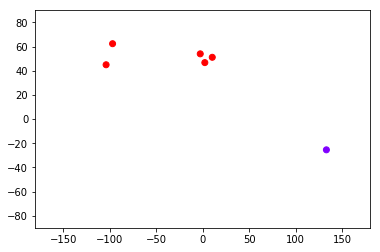

In [11]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

### WCSS

In [13]:
kmeans.inertia_

13208.95812

### the elbow method

In [17]:
wcss=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [18]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

Text(0, 0.5, 'within cluster sum of square')

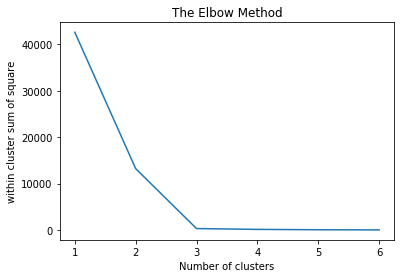

In [19]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within cluster sum of square')